# Lecture 5.3: Work on More Problems

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for this lecture:**
* Use the tools we have learnt so far to work on some problems. 
* Mini review.
    
</div>



In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# More about Billionaires

In [15]:
load("bil.Rdata")

## Exercise

Define a country's "gender gap" to be the difference in the percentage of male and female billionaires. (Hence, it is equal to zero if the country has exactly equal numbers of male and female billionaires.) 

Only one country has an equal number of male and female billionaires. The average gender gap across all countries is 0.85. If we plot countries according to their deviation from 0 (parity), grouping the 41 countries with no female billionaires into a single category, we obtain the following plot:

`summarise()` ungrouping output (override with `.groups` argument)



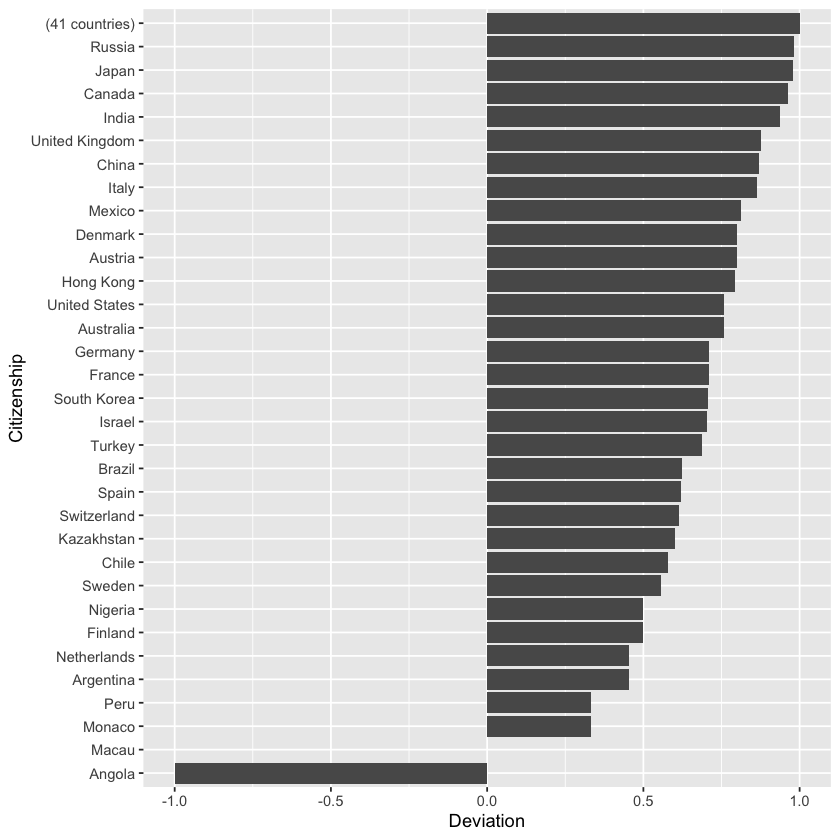

Recreate this plot. (If the billionaire represents a married couple, count it as both a male and female billionaire. If the billionaire represents a family fortune, drop it before summarizing thet data.)

In [ ]:
bil %>% group_by(citizenship) %>% summarize(n_male = sum(gender %in% c("male", "married couple")), 
                                            n_female = sum(gender %in% c("female", "married couple"))) %>% 
                                  mutate(gender_gap = (n_male - n_female) / (n_male + n_female)) %>% 
                                  filter(!is.na(gender_gap)) %>% 
                                  ungroup %>% mutate(Deviation = gender_gap)   %>% 
                                  mutate(citizenship=ifelse(Deviation == 1.0, "(41 countries)", citizenship)) %>%
                                  distinct(citizenship, Deviation) %>%
ggplot + geom_col(aes(x=fct_reorder(citizenship, Deviation), y=Deviation)) + coord_flip() + xlab("Citizenship")

# Exercise

In [18]:
library(nycflights13)

**(a)**
In the next few problems we will examine how departure delays covary between different air carriers in the NYC flights data set. First, determine the top six carriers in terms of the total number of flights they have in the data set. Store the result in `table3`. Your table should have two columns, `carrier` and `n` (the total number of flights in 2013), six rows, and be sorted in descending order of `n`.

In [20]:
table3 <- count(flights, carrier) %>% top_n(6, n) %>% arrange(desc(n)) %>% print

# A tibble: 6 x 2
  carrier     n
  <chr>   <int>
1 UA      58665
2 B6      54635
3 EV      54173
4 DL      48110
5 AA      32729
6 MQ      26397



Next, compute the median departure delay each day for the top six carriers that you found in problem 3. The first few entries are shown below:
<table class="table">
 <thead>
  <tr>
   <th> year </th>
   <th> month </th>
   <th> day </th>
   <th> carrier </th>
   <th> med_dep_delay </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td> 2013 </td>
   <td> 1 </td>
   <td> 1 </td>
   <td> AA </td>
   <td> -2.0 </td>
  </tr>
  <tr>
   <td> 2013 </td>
   <td> 1 </td>
   <td> 1 </td>
   <td> B6 </td>
   <td> 0.5 </td>
  </tr>
  <tr>
   <td> 2013 </td>
   <td> 1 </td>
   <td> 1 </td>
   <td> DL </td>
   <td> -3.5 </td>
  </tr>
  <tr>
   <td> 2013 </td>
   <td> 1 </td>
   <td> 1 </td>
   <td> EV </td>
   <td> 10.0 </td>
  </tr>
  <tr>
   <td> 2013 </td>
   <td> 1 </td>
   <td> 1 </td>
   <td> MQ </td>
   <td> -2.0 </td>
  </tr>
  <tr>
   <td> 2013 </td>
   <td> 1 </td>
   <td> 1 </td>
   <td> UA </td>
   <td> 2.0 </td>
  </tr>
    <tr>
        <td>&#8942;</td>
        <td>&#8942;</td>
        <td>&#8942;</td>
        <td>&#8942;</td>
        <td>&#8942;</td>
    </tr>
</tbody>
</table>

In [22]:
table4 <- filter(flights, carrier %in% table3$carrier) %>% 
                group_by(year, month, day, carrier) %>% 
                summarize(med_dep_delay=median(dep_delay, na.rm = T)) %>% print

`summarise()` regrouping output by 'year', 'month', 'day' (override with `.groups` argument)



# A tibble: 2,190 x 5
# Groups:   year, month, day [365]
    year month   day carrier med_dep_delay
   <int> <int> <int> <chr>           <dbl>
 1  2013     1     1 AA               -2  
 2  2013     1     1 B6                0.5
 3  2013     1     1 DL               -3.5
 4  2013     1     1 EV               10  
 5  2013     1     1 MQ               -2  
 6  2013     1     1 UA                2  
 7  2013     1     2 AA                0  
 8  2013     1     2 B6               -1  
 9  2013     1     2 DL               -2  
10  2013     1     2 EV               35  
# … with 2,180 more rows


Use `facet_wrap` to plot a histogram of the median daily departure time for each air carrier in `table4`. Restrict the $x$-axis of each histogram to the range $[-10,30]$ minutes.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 35 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”


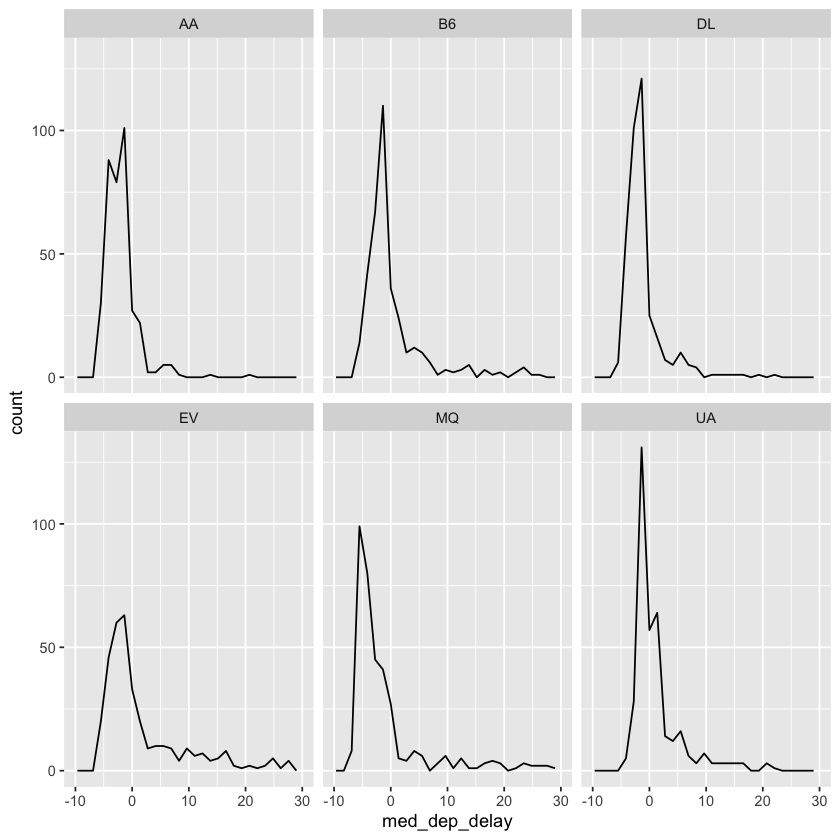

In [23]:
ggplot(table4) + geom_freqpoly(aes(x=med_dep_delay)) + 
    facet_wrap(~ carrier) + xlim(c(-10, 30))

Your data from table 4 should have one row per day per carrier. In order to study covariation between carriers, we need to *reshape* this data so that each carrier occupies a column. Perform the necessary reshape to obtain a table that looks like:
```
# A tibble: 365 x 9
# Groups:   year, month, day [365]
    year month   day    AA    B6    DL    EV    MQ    UA
   <int> <int> <int> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1  2013     1     1    -2   0.5  -3.5  10    -2       2
 2  2013     1     2     0  -1    -2    35    -2.5     3
 3  2013     1     3     0   1.5  -2     0    -4       2
 4  2013     1     4     0   3    -4     3    -5       1
 5  2013     1     5    -2   1    -3    -2.5  -4       1
 6  2013     1     6    -3   4    -3     3    -4       2
 7  2013     1     7    -2  -2    -3    -1    -5       1
 8  2013     1     8    -3  -1    -3    -2    -6      -1
 9  2013     1     9    -4  -2    -4    -5    -6      -2
10  2013     1    10    -4  -3    -4    -4    -6      -2
```

In [29]:
print(table4)
table4wide <- table4 %>% spread(key=carrier, value=med_dep_delay)%>%print

# A tibble: 2,190 x 5
# Groups:   year, month, day [365]
    year month   day carrier med_dep_delay
   <int> <int> <int> <chr>           <dbl>
 1  2013     1     1 AA               -2  
 2  2013     1     1 B6                0.5
 3  2013     1     1 DL               -3.5
 4  2013     1     1 EV               10  
 5  2013     1     1 MQ               -2  
 6  2013     1     1 UA                2  
 7  2013     1     2 AA                0  
 8  2013     1     2 B6               -1  
 9  2013     1     2 DL               -2  
10  2013     1     2 EV               35  
# … with 2,180 more rows
# A tibble: 365 x 9
# Groups:   year, month, day [365]
    year month   day    AA    B6    DL    EV    MQ    UA
   <int> <int> <int> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1  2013     1     1    -2   0.5  -3.5  10    -2       2
 2  2013     1     2     0  -1    -2    35    -2.5     3
 3  2013     1     3     0   1.5  -2     0    -4       2
 4  2013     1     4     0   3    -4     3    -5       1
 5  2

Use the table to visualize the joint distribution of median daily departure delay for American Airlines versus United Airlines. Produce an appropriate plot.

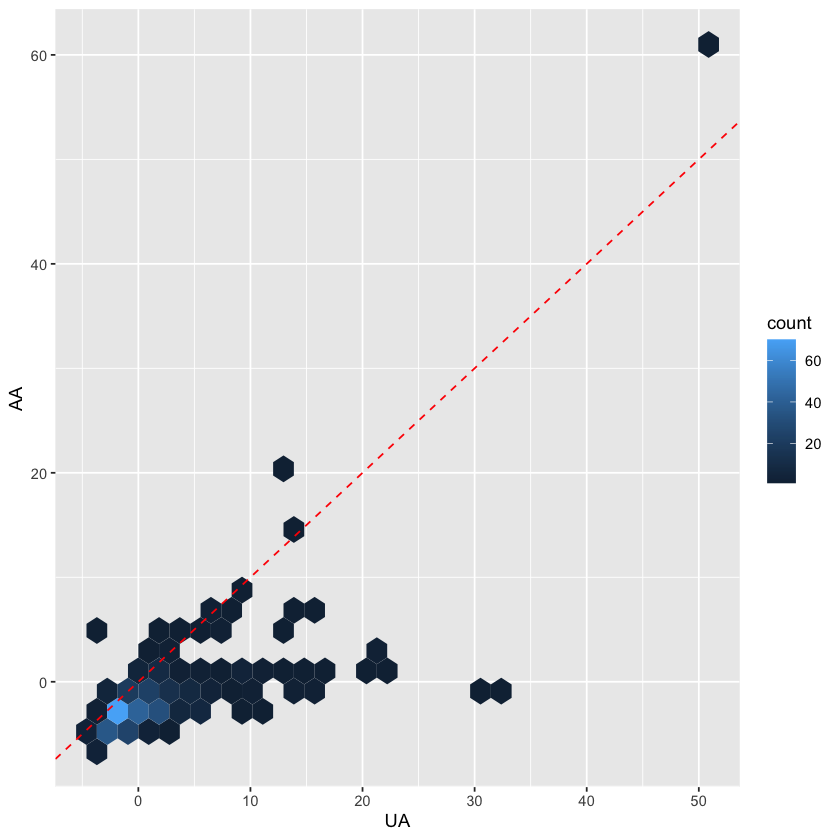

In [31]:
ggplot(table4wide) + geom_hex(aes(x=UA, y=AA)) + geom_abline(slope=1, linetype="dashed", color="red")

# Summary of the functions that we have learnt so far

`ggplot()`: making plots

`geom_point()`: making scatterplot

`geom_line()`: making line plot

`geom_smooth()`: Overlay a smoothed line as a function of your data onto your scatterplot

`facet_grid()` and `facet_wrap()`:  Make facets 

`geom_histogram()`: Plot a histogram

`geom_boxplot()`: Plot a boxplot


`filter()`: drop rows from a data table based on certain logical conditions

`select()`: keep *columns* in a data table by name, range, or logical conditions

`arrange()`: sort / reorder the rows of a data table

`mutate()`: generate new columns in a data table by applying functions to the existing ones

`group_by()` / `summarize()`: group rows together based on one or more variables, and compute summary statistics within each group.

`gather` -- merge multiple columns into one column (make table longer and narrower) 

`spread` -- spread one column into several columns (make table shorter and wider)

`unite` --  merge entries in multiple columns into one variable (make table narrower, but the rows of the table remain the same)

`separate` --  separate one entry in one variable into multiple entries in multiple columns (make table wider, but the rows of the table remain the same)
